<style>
    @media print{
        body {
            position:relative !important;
        }
        .celltag_new_page {
            page-break-before: always !important;
        }
    }
</style>
# COMPSCI 371D Homework 6

### Problem 0 (3 points)

## Preamble: The MNIST Dataset  

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def standardize(data):
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data).astype(np.float32)
    return data, scaler.mean_, scaler.scale_

In [4]:
def load_mnist():
    digits = datasets.load_digits()
    n, shape = digits.images.shape[0], digits.images.shape[1:]
    xs = digits.images.reshape((n, -1)).astype(np.float32)
    max_pixel = np.max(xs)
    xs, mean, std = standardize(xs)
    ys = digits.target.astype(np.uint8)
    return xs, ys, mean, std, max_pixel, shape

In [5]:
def data_split(xs, ys, test_fraction=0.5):
    x_train, x_test, y_train, y_test = train_test_split(
        xs, ys, test_size=test_fraction, shuffle=True)
    train = {'x': x_train, 'y': y_train}
    test = {'x': x_test, 'y': y_test}
    data = {'train': train, 'test': test}
    return data

In [6]:
def x_to_image(x):
    x = np.round(x * pixel_std + pixel_mean)
    x = np.clip(x * 255. / pixel_max, 0., 255.).astype(np.uint8)
    return np.reshape(x, image_shape)

In [7]:
def show_random_images(xs, ys, rows=3, columns=6):
    rng = np.random.default_rng()
    indices = rng.integers(low=0, high=len(ys), size=rows * columns)
    plt.figure(figsize=(2 * columns, 2.1 * rows), tight_layout=True)
    for plot, index in enumerate(indices):
        image = x_to_image(xs[index])
        plt.subplot(rows, columns, plot + 1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.title(ys[index], fontsize=18)
    plt.show()

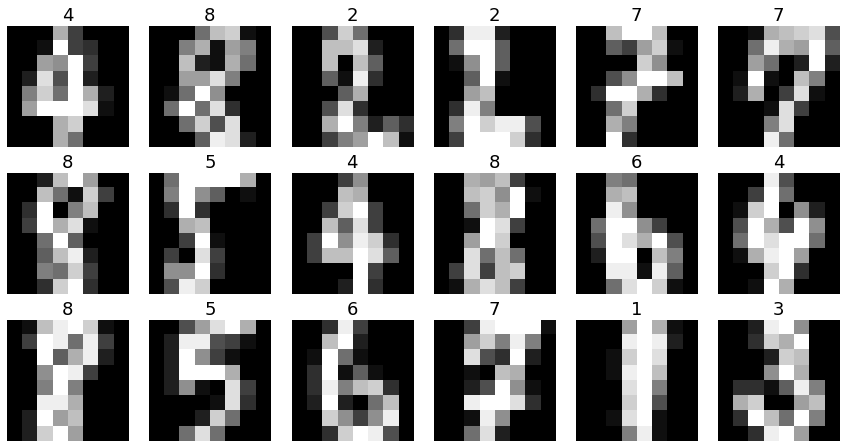

In [8]:
data_points, digit_labels, pixel_mean, pixel_std, pixel_max, image_shape = load_mnist()
show_random_images(data_points, digit_labels)
digit_dataset = data_split(data_points, digit_labels)

## Preamble: Three Classifiers

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

tolerance = 1.e-8
LogReg = LogisticRegression(
    C=1, solver='lbfgs', tol=tolerance,
    max_iter=100000, random_state=0)
LinearSvm = SVC(kernel='linear', tol=tolerance)
RbfSvm = SVC(kernel='rbf', tol=tolerance)

## Part 1: Binary Classifiers

### Problem 1.1

In [10]:
def evaluate(h, data):
    def error_rate(predictor, samples):
        x, y = samples['x'], samples['y']
        return (1 - predictor.score(x, y)) * 100

    e_train = error_rate(h, data['train'])
    e_test = error_rate(h, data['test'])
    return e_train, e_test

In [93]:
def evaluate_classifiers(xs, ys):
    logreg_stats = []
    linear_svm_stats = []
    rbf_svm_stats = []
    for i in range(10):
        data = data_split(xs,ys)
        LogReg.fit(data["train"]["x"], data["train"]["y"])
        logreg_stats.append(evaluate(LogReg, data))
        LinearSvm.fit(data["train"]["x"], data["train"]["y"])
        linear_svm_stats.append(evaluate(LinearSvm, data))
        RbfSvm.fit(data["train"]["x"], data["train"]["y"])
        rbf_svm_stats.append(evaluate(RbfSvm, data))
    classifiers = {"Logistic Regression": logreg_stats, 
                        "Linear SVM": linear_svm_stats, 
                        "RBF SVM": rbf_svm_stats}
    for c in classifiers.keys():
        print("Error statistics for the " + c +  " classifier (percent):")
        print(("\t Training: min {}, max {}, mean {}, std {}").format(round(np.min(classifiers[c][0]),3),
                                                                    round(np.max(classifiers[c][0]),3),
                                                                    round(np.mean(classifiers[c][0]),3),
                                                                    round(np.std(classifiers[c][0]),3)))
        print(("\t Testing: min {}, max {}, mean {}, std {} \n").format(round(min(classifiers[c][1]),3),
                                                                    round(max(classifiers[c][1]),3),
                                                                    round(np.mean(classifiers[c][1]),3),
                                                                    round(np.std(classifiers[c][1]),3)))
    
    
    

In [89]:
subset = []
for i in digit_labels:
    if i == 3 or i == 7:
        subset.append(True)
    else:
        subset.append(False)
pair_data_points = data_points[subset]
pair_labels = digit_labels[subset]

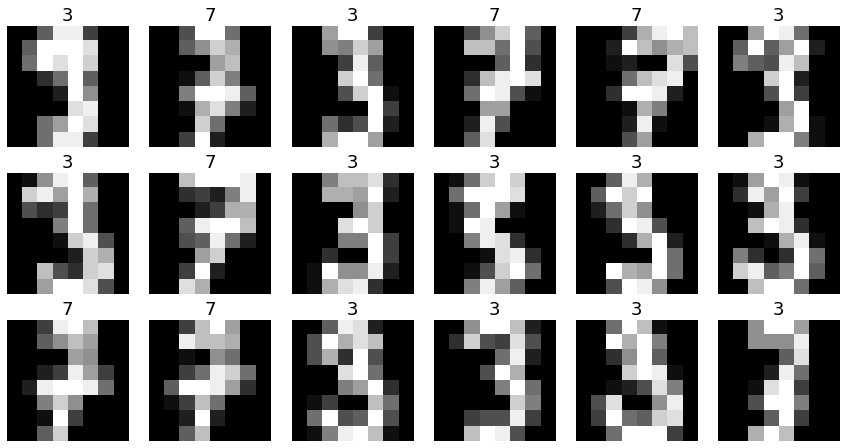

In [90]:
show_random_images(pair_data_points, pair_labels)

In [94]:
evaluate_classifiers(pair_data_points, pair_labels)

Error statistics for the Logistic Regression classifier (percent):
	 Training: min 0.0, max 0.552, mean 0.276, std 0.276
	 Testing: min 0.0, max 0.0, mean 0.0, std 0.0 

Error statistics for the Linear SVM classifier (percent):
	 Training: min 0.0, max 0.552, mean 0.276, std 0.276
	 Testing: min 0.0, max 0.0, mean 0.0, std 0.0 

Error statistics for the RBF SVM classifier (percent):
	 Training: min 0.0, max 0.0, mean 0.0, std 0.0
	 Testing: min 0.0, max 0.0, mean 0.0, std 0.0 



### Problem 1.2 (Exam Style)

Some of the data sets in the sample are linearly separable based on the error rate statistics all being equivalent to 0, meaning the error rate was 0 for all 10 evaluations of the data. This error rate of 0.0 suggests that the data is linearly separable since no errors were made in classification, and the linear classifiers were able to perfectly separate all of the data point in the training set. 

### Problem 1.3 (Exam Style)

The RBF SVM appears to be slightly worse performance wise than the Linear SVM.

### Problem 1.4

### Problem 1.5 (Exam Style)

### Problem 1.6 (Exam Style)

## Part 2: Margins 

In [ ]:
def hyperplane(h):
    return h.intercept_, h.coef_[0]

### Problem 2.1

In [ ]:
def show_margins(m, ref_margin, title, font_size=18):
    plt.figure(figsize=(15, 3), tight_layout=True)
    edges = np.logspace(-2, np.log10(max(m)), 50)
    plt.hist(m, bins=edges, rwidth=0.9)
    plt.axvline(ref_margin, color='r', lw=3.)
    title = 'Margin distribution for the {}'.format(title)
    plt.title(title, fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.show()

In [ ]:
def margins(data, h):

In [ ]:
def show_all_classifier_margins(dataset):

In [ ]:
pair_dataset = data_split(pair_data_points, pair_labels)
show_all_classifier_margins(pair_dataset)

### Problem 2.2 (Exam Style)

### Problem 2.3

In [ ]:
parity_dataset = data_split(data_points, parity_labels)

### Problem 2.4 (Exam Style)

## Part 3: Multiclass Classifiers

### Problem 3.1 (Partially Exam Style)

In [ ]:
evaluate_classifiers(data_points, digit_labels)